# Airbnb Cambridge Analytics 2022-2023

# Price Analysis

# Seasonality Trends and Forecasts

### Search for "Insight"

In [1]:
# Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import data_table
from google.colab import drive
pd.set_option('display.max_columns', None)
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Loading datasets from http://insideairbnb.com/get-the-data/

In [ ]:
# Import Airbnb data for 1 year period - Option 1 (Local)

##from google.colab import files
##uploaded = files.upload()

In [2]:
# Import Airbnb data for 1 year period - Option 2 (Google Drive)
#	reviews.csv.gz, calendar.csv.gz, 	listings.csv.gz files were used from each quater

dataFile='reviews_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='reviews_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
reviews_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='listings_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
listings_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_Sep22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_Sep22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_Dec22.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_Dec22 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_March23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_March23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

dataFile='calendar_June23.csv'
drive.mount("/content/drive", force_remount=True)
url = '/content/drive/MyDrive/Airbnb_Project/'+ dataFile
calendar_June23 = pd.read_csv(url,sep=",",)
drive.flush_and_unmount()

Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [3]:
# Create single datasets for reviews, calendar, listing
reviews = pd.concat([reviews_Sep22, reviews_Dec22, reviews_March23, reviews_June23])
calendar = pd.concat([calendar_Sep22, calendar_Dec22, calendar_March23, calendar_June23])
listings = pd.concat([listings_Sep22, listings_Dec22, listings_March23, listings_June23])

# Neighborhood and Seasonality Price Trends

In [4]:
################################################################################
#                                                                              #
# Make Copy from Master Datasets for Use                                       #
#                                                                              #
################################################################################

reviews_x = reviews.copy()
calendar_x = calendar.copy()
listings_x = listings.copy()

In [5]:
# Check accommodates in various neighourhoods
print('Cambridge: Persons Accommodated')
print(listings_x['accommodates'].value_counts())
##print(listings_x['neighbourhood_cleansed'].value_counts())
print('MIT: Persons Accommodated')
print(listings_x[listings_x['neighbourhood_cleansed']=='Area 2/MIT']['accommodates'].value_counts())

Cambridge: Persons Accommodated
2     2673
4     1131
1      683
3      603
6      370
5      368
8      177
7       70
10      42
9       24
14       8
12       8
16       5
0        1
11       1
Name: accommodates, dtype: int64
MIT: Persons Accommodated
2     518
4     173
3     110
5      64
6      51
1      36
8      15
7      10
12      2
16      1
Name: accommodates, dtype: int64


In [6]:
# Check Min Nights
listings_x['minimum_nights']

0        2
1        3
2       10
3        5
4        5
        ..
1056     5
1057    30
1058    30
1059     2
1060    91
Name: minimum_nights, Length: 6164, dtype: int64

   neighbourhood_cleansed  price_per_person
0                 Agassiz         66.237525
1              Area 2/MIT        109.845362
2     Cambridge Highlands         77.455882
3           Cambridgeport         69.731466
4          East Cambridge         84.571882
5           Mid-Cambridge         73.829533
6       Neighborhood Nine         73.521036
7         North Cambridge         61.838576
8               Riverside         67.021346
9         Strawberry Hill         51.151410
10               The Port         71.927693
11  Wellington-Harrington         48.797910
12         West Cambridge         65.103396

Most Expensive Neighborhood: Area 2/MIT, $109.85
Cheapest Neighborhood: Wellington-Harrington, $48.8
Select Neighborhood: East Cambridge, $84.57


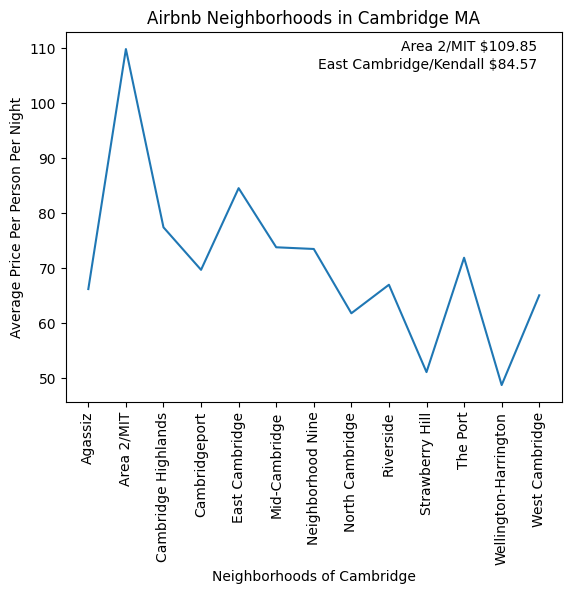

In [7]:
# Use 'host_neighbourhood' and 'neighbourhood_cleansed' from listings_x
##neighbor = listings_x[['host_neighbourhood','neighbourhood_cleansed']]
neightborhood_price = listings_x[['neighbourhood_cleansed', 'price','accommodates']].copy()
neightborhood_price['price'] = neightborhood_price['price'].replace({'\$': '', ',': ''}, regex=True)
neightborhood_price['price'] = pd.to_numeric(neightborhood_price['price'])
neightborhood_price = neightborhood_price[neightborhood_price['price']>0]

# Divide price by # people accommodated by rental
avg_price_per_person = neightborhood_price['price'] / neightborhood_price['accommodates']

# Avg Price Per Person
avg_neighbor_price = pd.DataFrame({
    'neighbourhood_cleansed': neightborhood_price['neighbourhood_cleansed'],
    'price_per_person': avg_price_per_person})
avg_neighbor_price = avg_neighbor_price.groupby('neighbourhood_cleansed')['price_per_person'].mean().reset_index()
print(avg_neighbor_price)
print()

#Max and min prices of neighborhoods
#print(avg_neighbor_price)
Exp = avg_neighbor_price['price_per_person'].max()
N_max = avg_neighbor_price[avg_neighbor_price['price_per_person'] == Exp]['neighbourhood_cleansed'].values.tolist()
N_max_formatted = ', '.join(N_max)
print('Most Expensive Neighborhood: ' + N_max_formatted + ', $'+str(round(Exp,2)))
Cheap=avg_neighbor_price['price_per_person'].min()
N_min = avg_neighbor_price[avg_neighbor_price['price_per_person'] == Cheap]['neighbourhood_cleansed'].values.tolist()
N_min_formatted = ', '.join(N_min)
print('Cheapest Neighborhood: ' + N_min_formatted + ', $'+str(round(Cheap,2)))

#Find East Cambridge (next to MIT)
second_price = avg_neighbor_price[avg_neighbor_price['neighbourhood_cleansed'] == 'East Cambridge']['price_per_person'].values[0]
print('Select Neighborhood: East Cambridge, $'+str(round(second_price,2)))

neighborhood1 = N_max_formatted +' $'+ str(round(Exp,2))
neighborhood2 = 'East Cambridge/Kendall $'+str(round(second_price,2))

plt.plot(avg_neighbor_price.iloc[:, 0], avg_neighbor_price.iloc[:, 1])
plt.xlabel("Neighborhoods of Cambridge")
plt.ylabel('Average Price Per Person Per Night')
plt.xticks(rotation=90)
plt.title('Airbnb Neighborhoods in Cambridge MA')
x1, y1 = 0.95, 0.95
x2, y2 = 0.95, 0.90
plt.text(x1, y1, neighborhood1, transform=plt.gca().transAxes, ha='right', fontsize=10)
plt.text(x2, y2, neighborhood2, transform=plt.gca().transAxes, ha='right', fontsize=10)
plt.show()

**Insight:**

MIT and East Cambridge are the two most expensive areas for rentals and are also two of the areas closest to downtown Boston or convention/business centers.

Start Date: 2022-09-22
End Date: 2024-06-26

Spring (Green) Start: March 20
Summer (Red) Start: June 21
Fall (Yellow) Start: September 23
Winter (Blue) Start: December 21


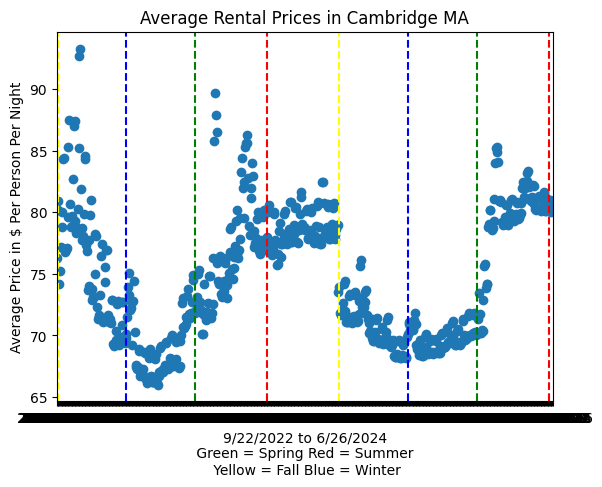

In [8]:
# Trends and Time series
calendar_date_available_price = calendar_x[['listing_id','date','available','price']]
##print(calendar_date_available_price)
listing_reviews=listings_x[['id','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                            'review_scores_communication', 'review_scores_location','review_scores_value','accommodates']]
listing_reviews2=pd.DataFrame.dropna(listing_reviews)
##print(listing_reviews2)

# Merge listings and calendar using ID, keep info on date and prices for those dates
trend = calendar_date_available_price.merge(listing_reviews2,left_on='listing_id',right_on='id')
##print(trend)

# Clean price column to remove $, help from ChatGPT
trend['price'] = trend['price'].str.replace('$', '',regex=False).str.replace(',', '',regex=False)
trend['price'] = pd.to_numeric(trend['price'])

# Divide price by # people accommodated by rental
trend_price_per_person = trend['price'] / trend['accommodates']

# Create DataFrame with the 'date' and 'price' columns
date_price_data = pd.DataFrame({'date': trend['date'], 'price_per_person': trend_price_per_person})
date_price_avg = date_price_data.groupby('date')['price_per_person'].mean().reset_index()

# Provide Info on Change of Seasons
print('Start Date: '+ date_price_avg['date'].min())
print('End Date: '+ date_price_avg['date'].max())
print()
print('Spring (Green) Start: March 20')
print('Summer (Red) Start: June 21')
print('Fall (Yellow) Start: September 23')
print('Winter (Blue) Start: December 21')

# Enhance visualization of rental projection, added lines for change of seasons
plt.scatter(date_price_avg.iloc[:, 0], date_price_avg.iloc[:, 1])
plt.xlabel('9/22/2022 to 6/26/2024\n Green = Spring Red = Summer \n Yellow = Fall Blue = Winter')
plt.ylabel('Average Price in $ Per Person Per Night')
plt.title('Average Rental Prices in Cambridge MA')
plt.xlim(left=min(date_price_avg['date']), right=max(date_price_avg['date']))

# Dates for change of seasons
specific_dates_spring = ['2023-03-20','2024-03-19']
specific_dates_summer = ['2023-06-21','2024-06-21']
specific_dates_fall = ['2022-09-23','2023-09-23']
specific_dates_winter = ['2022-12-21','2023-12-21']

for specific_date in specific_dates_spring:
    line_index = date_price_avg[date_price_avg['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='green', linestyle='--')
for specific_date in specific_dates_summer:
    line_index = date_price_avg[date_price_avg['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='red', linestyle='--')
for specific_date in specific_dates_fall:
    line_index = date_price_avg[date_price_avg['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='yellow', linestyle='--')
for specific_date in specific_dates_winter:
    line_index = date_price_avg[date_price_avg['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='blue', linestyle='--')
plt.show()

**Insight:**

Demand and Price increase during the Summer due to:

1) Tourism around historic Boston area

2) Family and friends attending graduations

3) Cambridge is "walking distance" to Boston per text mining analysis

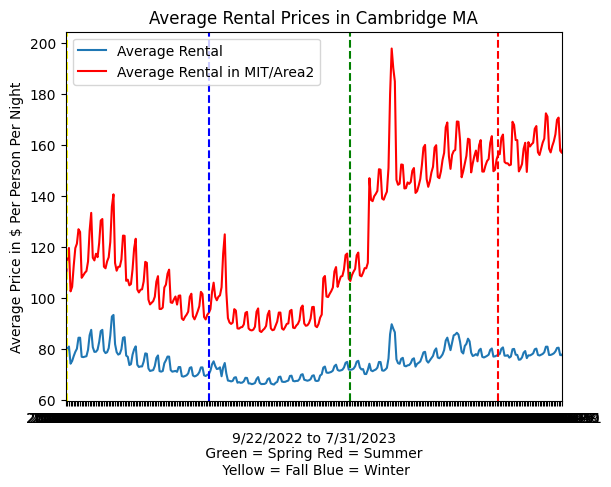

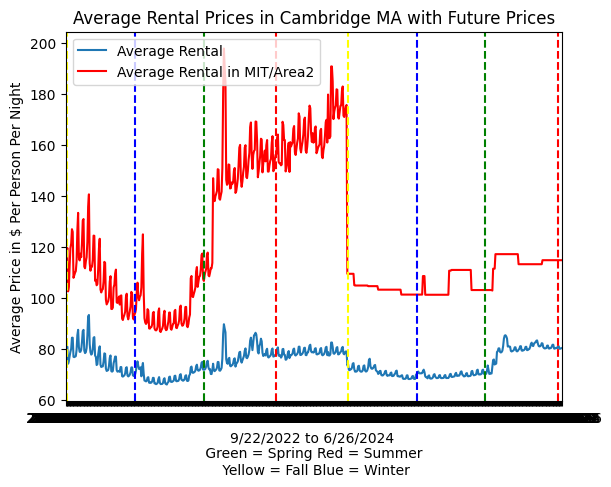

In [9]:
# Rental prices for MIT vs. trend averages
# "date_price_avg" is for overall average price for each day

calendar_date_available_price = calendar_x[['listing_id','date','available','price']]
listing_price_neighborhood=listings_x[['id','neighbourhood_cleansed','accommodates']]
listing_price_neighborhood2=pd.DataFrame.dropna(listing_price_neighborhood)
MIT_rentals=listing_price_neighborhood2[listing_price_neighborhood2['neighbourhood_cleansed'] == 'Area 2/MIT']

# Find rentals only for MIT area, merge listings subset and calendar (same as above)
trend_MIT = calendar_date_available_price.merge(MIT_rentals,left_on='listing_id',right_on='id',how='inner')
##print(trend_MIT)

# Clean price column to remove $
trend_MIT['price'] = trend_MIT['price'].str.replace('$', '',regex=False).str.replace(',', '',regex=False)
trend_MIT['price'] = pd.to_numeric(trend_MIT['price'])

# Divide price by # people accommodated by rental
trend_MIT_ppp = trend_MIT['price'] / trend_MIT['accommodates']

# Create DataFrame with the 'date' and 'price' columns
date_price_MIT_data = pd.DataFrame({'date': trend_MIT['date'], 'price_per_person': trend_MIT_ppp})
MIT_avg_price = date_price_MIT_data.groupby('date')['price_per_person'].mean().reset_index()

# Enhance visualization of rental projection, added lines for change of seasons
# Almost entirely similar to above code
# Use cut off of 7/31/2023 to not include future dates
plt.plot(date_price_avg['date'], date_price_avg['price_per_person'], label='Average Rental')
plt.plot(MIT_avg_price['date'], MIT_avg_price['price_per_person'], color='red', label='Average Rental in MIT/Area2')
plt.xlabel('9/22/2022 to 7/31/2023\n Green = Spring Red = Summer \n Yellow = Fall Blue = Winter')
plt.ylabel('Average Price in $ Per Person Per Night')
plt.title('Average Rental Prices in Cambridge MA')
plt.xlim(left=min(date_price_avg['date']), right='2023-07-31')
plt.legend(loc='upper left')
# Split data into seasons
specific_dates_spring = ['2023-03-20','2024-03-19']
specific_dates_summer = ['2023-06-21','2024-06-21']
specific_dates_fall = ['2022-09-23','2023-09-23']
specific_dates_winter = ['2022-12-21','2023-12-21']
for specific_date in specific_dates_spring:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='green', linestyle='--')
for specific_date in specific_dates_summer:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='red', linestyle='--')
for specific_date in specific_dates_fall:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='yellow', linestyle='--')
for specific_date in specific_dates_winter:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='blue', linestyle='--')
plt.show()

# Rerun above code/visualization WITH future bookings for future dates
plt.plot(date_price_avg['date'], date_price_avg['price_per_person'], label='Average Rental')
plt.plot(MIT_avg_price['date'], MIT_avg_price['price_per_person'], color='red', label='Average Rental in MIT/Area2')
plt.xlabel('9/22/2022 to 6/26/2024 \n Green = Spring Red = Summer \n Yellow = Fall Blue = Winter')
plt.ylabel('Average Price in $ Per Person Per Night')
plt.title('Average Rental Prices in Cambridge MA with Future Prices')
plt.legend(loc='upper left')
plt.xlim(left=min(date_price_avg['date']), right=max(date_price_avg['date']))
for specific_date in specific_dates_spring:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='green', linestyle='--')
for specific_date in specific_dates_summer:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='red', linestyle='--')
for specific_date in specific_dates_fall:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='yellow', linestyle='--')
for specific_date in specific_dates_winter:
    line_index = MIT_avg_price[MIT_avg_price['date'] == specific_date].index[0]
    plt.axvline(x=line_index, color='blue', linestyle='--')
plt.show()

**Insight:**

Unable to rely on actual data for future supply and pricing information. Forecast analysis is needed.

# Forecast Price Per Person Per Night for MIT

In [10]:
! pip install dmba
from dmba import regressionSummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.5 MB/s eta 0:00:00
Colab environment detected.


In [11]:
# Forecast Analysis for Next Year
# date_price_avg => "date" and "price_per_person" columns
# MIT_avg_price => "date" and "price_per_person" columns

df_mit = MIT_avg_price
##print(df_mit)
df_mit['date'] = pd.to_datetime(df_mit['date'])
df_mit_ts = pd.Series(df_mit['price_per_person'].values, index=pd.to_datetime(df_mit['date']), name='price_per_person')
print(df_mit_ts)

date
2022-09-22    105.575581
2022-09-23    115.927266
2022-09-24    119.537427
2022-09-25    102.531751
2022-09-26    104.336206
                 ...    
2024-06-22    114.753425
2024-06-23    114.753425
2024-06-24    114.753425
2024-06-25    114.753425
2024-06-26    114.753425
Name: price_per_person, Length: 644, dtype: float64


In [12]:
# Data partition for the time series data
nValid = 278
nTrain = len(df_mit_ts) - nValid
train_ts = df_mit_ts[:nTrain]
valid_ts = df_mit_ts[nTrain:]

# Model 4: A model with polynomial trend and seasonality
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
ts_df = tsatools.add_trend(df_mit_ts, trend='ct')
ts_df['month'] = ts_df.index.month

# nValid and nTrain as before
nValid = 278
nTrain = len(df_mit_ts) - nValid

# Partition the data into training and validation sets
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]

# Create the model formula
modelformula = 'price_per_person ~ trend + np.square(trend) + C(month)'

# Fit the linear regression model
mit_lm_trendseason = sm.ols(formula=modelformula, data=train_df).fit()

# Print the summary of the model
print(mit_lm_trendseason.summary())

                            OLS Regression Results                            
Dep. Variable:       price_per_person   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     344.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          3.00e-191
Time:                        22:31:54   Log-Likelihood:                -1292.9
No. Observations:                 366   AIC:                             2614.
Df Residuals:                     352   BIC:                             2669.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           65.7074      7.488  

In [13]:
# Evaluate Model4 performance
predict_mit_lm_trendseason = mit_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts, predict_mit_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -52.7269
       Root Mean Squared Error (RMSE) : 55.2483
            Mean Absolute Error (MAE) : 52.7269
          Mean Percentage Error (MPE) : -48.7447
Mean Absolute Percentage Error (MAPE) : 48.7447


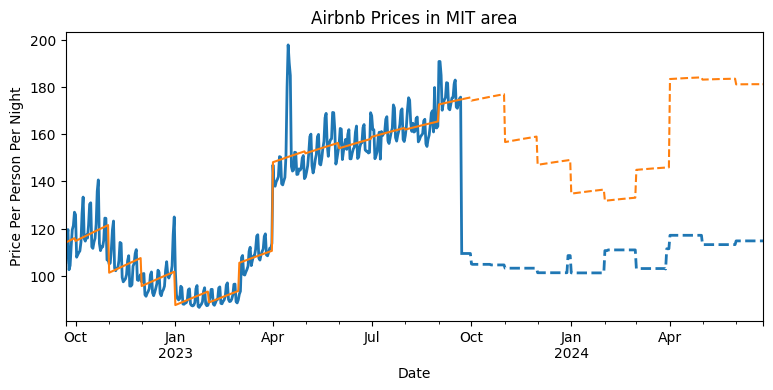

In [14]:
# Visulize Model4
# Blue line for the original time series
# Orange line for the forecasted time series
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_df.plot(y='price_per_person',ax=ax,color='C0',linewidth=2)
valid_df.plot(y='price_per_person',ax=ax,color='C0',linewidth=2, linestyle='dashed')
mit_lm_trendseason.predict(train_df).plot(color='C1')
mit_lm_trendseason.predict(valid_df).plot(color='C1',linestyle='dashed')
ax.set_xlabel('Date')
ax.set_ylabel('Price Per Person Per Night')
ax.set_title('Airbnb Prices in MIT area')
ax.get_legend().remove()
plt.show()

### Polynomial Forecast with Seasonality

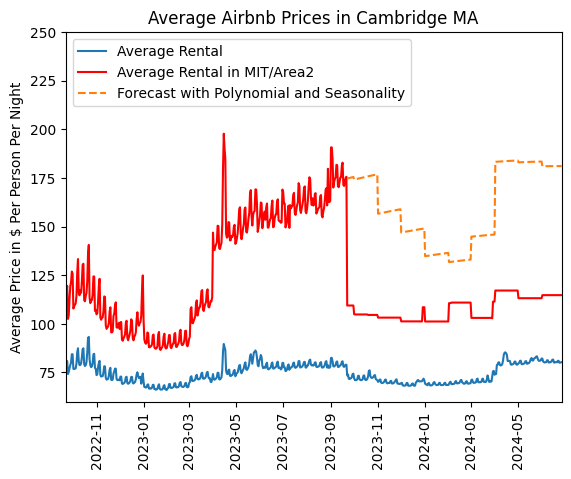

In [19]:
# Convert 'date' column to datetime format
MIT_avg_price['date'] = pd.to_datetime(MIT_avg_price['date'])
date_price_avg['date'] = pd.to_datetime(date_price_avg['date'])

# Rerun above code with forecast
plt.plot(date_price_avg['date'], date_price_avg['price_per_person'], label='Average Rental')
plt.plot(MIT_avg_price['date'], MIT_avg_price['price_per_person'], color='red', label='Average Rental in MIT/Area2')

# Forecast
predicted_values = mit_lm_trendseason.predict(valid_df)
plt.plot(valid_df.index, predicted_values, color='C1', linestyle='dashed', label='Forecast with Polynomial and Seasonality')

# Plot various
plt.xlabel('')
plt.ylabel('Average Price in $ Per Person Per Night')
plt.title('Average Airbnb Prices in Cambridge MA')
plt.legend(loc='upper left')
plt.xlim(left=min(date_price_avg['date']), right=max(date_price_avg['date']))
plt.ylim(bottom=60, top=250)
plt.xticks(rotation=90)
plt.show()